## 참고 문서

- https://inahjeon.github.io/fasttext/

Pre-trained 페이스북 모델을 이용

- https://fasttext.cc/docs/en/crawl-vectors.html

```bash
wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ko.300.bin.gz
gunzip cc.ko.300.bin.gz
```

### 모델 로딩 - 컴퓨터 사양에 따라 2-5분

In [1]:
from gensim import models

model = models.fasttext.load_facebook_model('dataset/cc.ko.300.bin')

### 모델 확인

In [21]:
from pprint import pprint
pprint(model.wv.similar_by_word('요구르트', 15))

[('요구르트란', 0.6581853628158569),
 ('요구르트가', 0.6238152980804443),
 ('요구르트나', 0.6092684864997864),
 ('요구르트의', 0.6040780544281006),
 ('요구르트는', 0.6016534566879272),
 ('요구르트도', 0.5866994857788086),
 ('요구르트에', 0.5772258043289185),
 ('요구르트와', 0.5720334649085999),
 ('요구르트등', 0.5644703507423401),
 ('요구르트를', 0.543565571308136),
 ('발효유', 0.5286842584609985),
 ('요구르트로', 0.5263258814811707),
 ('플레인요구르트', 0.5114519596099854),
 ('관광객뿐', 0.5098961591720581),
 ('요거트', 0.5080659985542297)]


In [28]:
print(model.wv.similarity('아이언맨', '헐크'))
print(model.wv.similarity('아이언맨', '스파이더맨'))
print(model.wv.similarity('토르', '묠니르'))

0.40336058
0.55264544
0.3441116


### 단어 벡터를 PCA 를 이용해 2차원으로 축소 후 차팅

In [51]:
from sklearn.decomposition import PCA

words = [
    '아이언맨',
    '스파이더맨',
    '헐크',
    '타노스',
    '캡틴아메리카',
    '어벤져스',
    '워머신',
    '호크아이',
    '블랙위도우',
    '페퍼포츠',
    '닉퓨리'
]

pca = PCA(n_components=2)
decomposed = pca.fit_transform([model.wv.word_vec(word) for word in words])

In [52]:
print(decomposed.shape)
xAxis = decomposed[:,0]
yAxis = decomposed[:,1]

(11, 2)


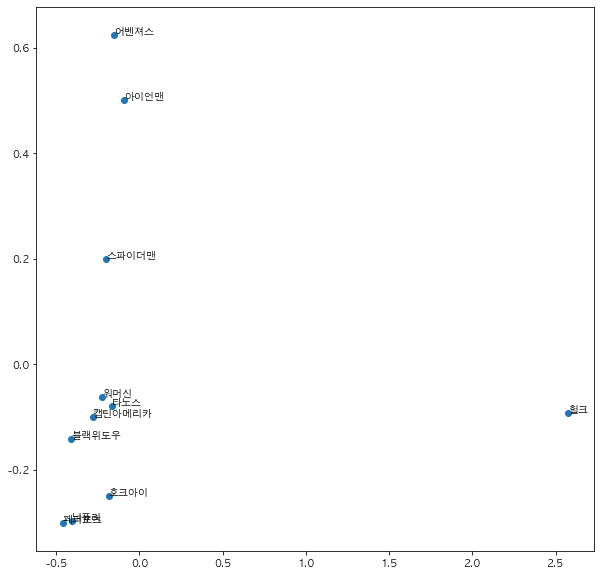

In [64]:
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

# OSX specific
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


plt.figure(figsize=(10, 10))
plt.scatter(xAxis, yAxis, marker='o')
# plt.xlim(-3, 3)
# plt.ylim(-3, 3)

for i, label in enumerate(words):
    plt.annotate(label, xy=(xAxis[i], yAxis[i]))